<a href="https://colab.research.google.com/github/VinaySingh561/LARGE-LANGUAGE-MODELS/blob/main/Attention_Mechanism_with_Q_K_and_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## let's say we have a input tensor embedding
import torch
vocab_size = 5
dim =3
input_tensor = torch.nn.Embedding(vocab_size, dim)
print(input_tensor)

Embedding(5, 3)


In [3]:
input_tensor_embeddings = input_tensor(torch.arange(vocab_size))
print(input_tensor_embeddings)

tensor([[ 0.6864,  0.0199,  0.6819],
        [-1.0123, -0.9980, -0.5006],
        [ 1.1775, -2.4291, -0.9669],
        [-0.8991, -2.3274,  0.6725],
        [-1.3175,  0.1503,  0.5871]], grad_fn=<EmbeddingBackward0>)


In [8]:
# now we want to calcualte attention score for token 2
query = input_tensor_embeddings[2]

attention_scores_2 = torch.empty(input_tensor_embeddings.shape[0])
for i, x_i in enumerate(input_tensor_embeddings):
  attention_scores_2[i] = torch.dot(x_i,query)
print(f"Attention scores for query 2 is : {attention_scores_2.detach()}")

Attention scores for query 2 is : tensor([ 0.1004,  1.7163,  8.2217,  3.9447, -2.4841])


In [13]:
# now we need to normalize these scores to make them equiavalent to probs
attention_weights = torch.softmax(attention_scores_2.detach(), dim =0)
print(attention_weights)

tensor([2.9255e-04, 1.4723e-03, 9.8454e-01, 1.3669e-02, 2.2068e-05])


In [14]:
print(torch.sum
      (attention_weights))

tensor(1.)


In [21]:
## now calculate context vector using attention weights
context_vector_2 = torch.matmul(input_tensor_embeddings.T,attention_weights)
print(context_vector_2)

tensor([ 1.1457, -2.4248, -0.9433], grad_fn=<MvBackward0>)


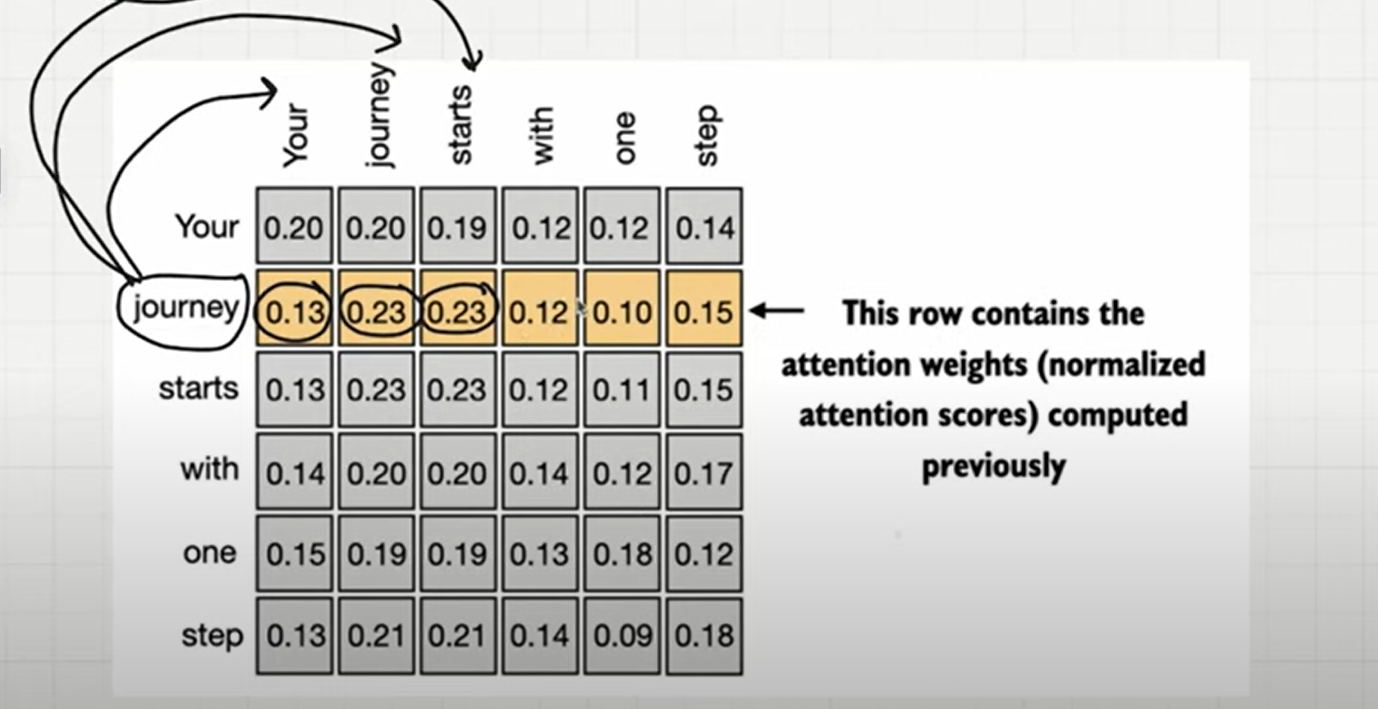

In [33]:
### now calulcating context vector for all the vectors
attention_matrix = torch.matmul(input_tensor_embeddings.detach(),input_tensor_embeddings.detach().T)
print(attention_matrix.shape)
print(attention_matrix)

torch.Size([5, 5])
tensor([[ 0.9365, -1.0561,  0.1004, -0.2049, -0.5009],
        [-1.0561,  2.2714,  1.7163,  2.8962,  0.8897],
        [ 0.1004,  1.7163,  8.2217,  3.9447, -2.4841],
        [-0.2049,  2.8962,  3.9447,  6.6775,  1.2294],
        [-0.5009,  0.8897, -2.4841,  1.2294,  2.1030]])


In [40]:
# context vector for all the words
#normalizing the attention matrix
normaized_attention_matrix = torch.softmax(attention_matrix,dim=-1)
print(torch.sum(normaized_attention_matrix,dim=-1))
context_vector = torch.matmul(normaized_attention_matrix,input_tensor_embeddings.detach())
print(f"Initial embedding vectos \n {input_tensor_embeddings.detach()}")
print(f"Context vector\n {context_vector.shape}")
print(context_vector)

tensor([1., 1., 1., 1., 1.])
Initial embedding vectos 
 tensor([[ 0.6864,  0.0199,  0.6819],
        [-1.0123, -0.9980, -0.5006],
        [ 1.1775, -2.4291, -0.9669],
        [-0.8991, -2.3274,  0.6725],
        [-1.3175,  0.1503,  0.5871]])
Context vector
 torch.Size([5, 3])
tensor([[ 0.2156, -0.8824,  0.2581],
        [-0.6227, -1.7971,  0.0999],
        [ 1.1457, -2.4248, -0.9433],
        [-0.7780, -2.2938,  0.5502],
        [-1.0734, -0.6344,  0.4223]])


why context vector training  is important , why embedding vector alone can not explain everything?

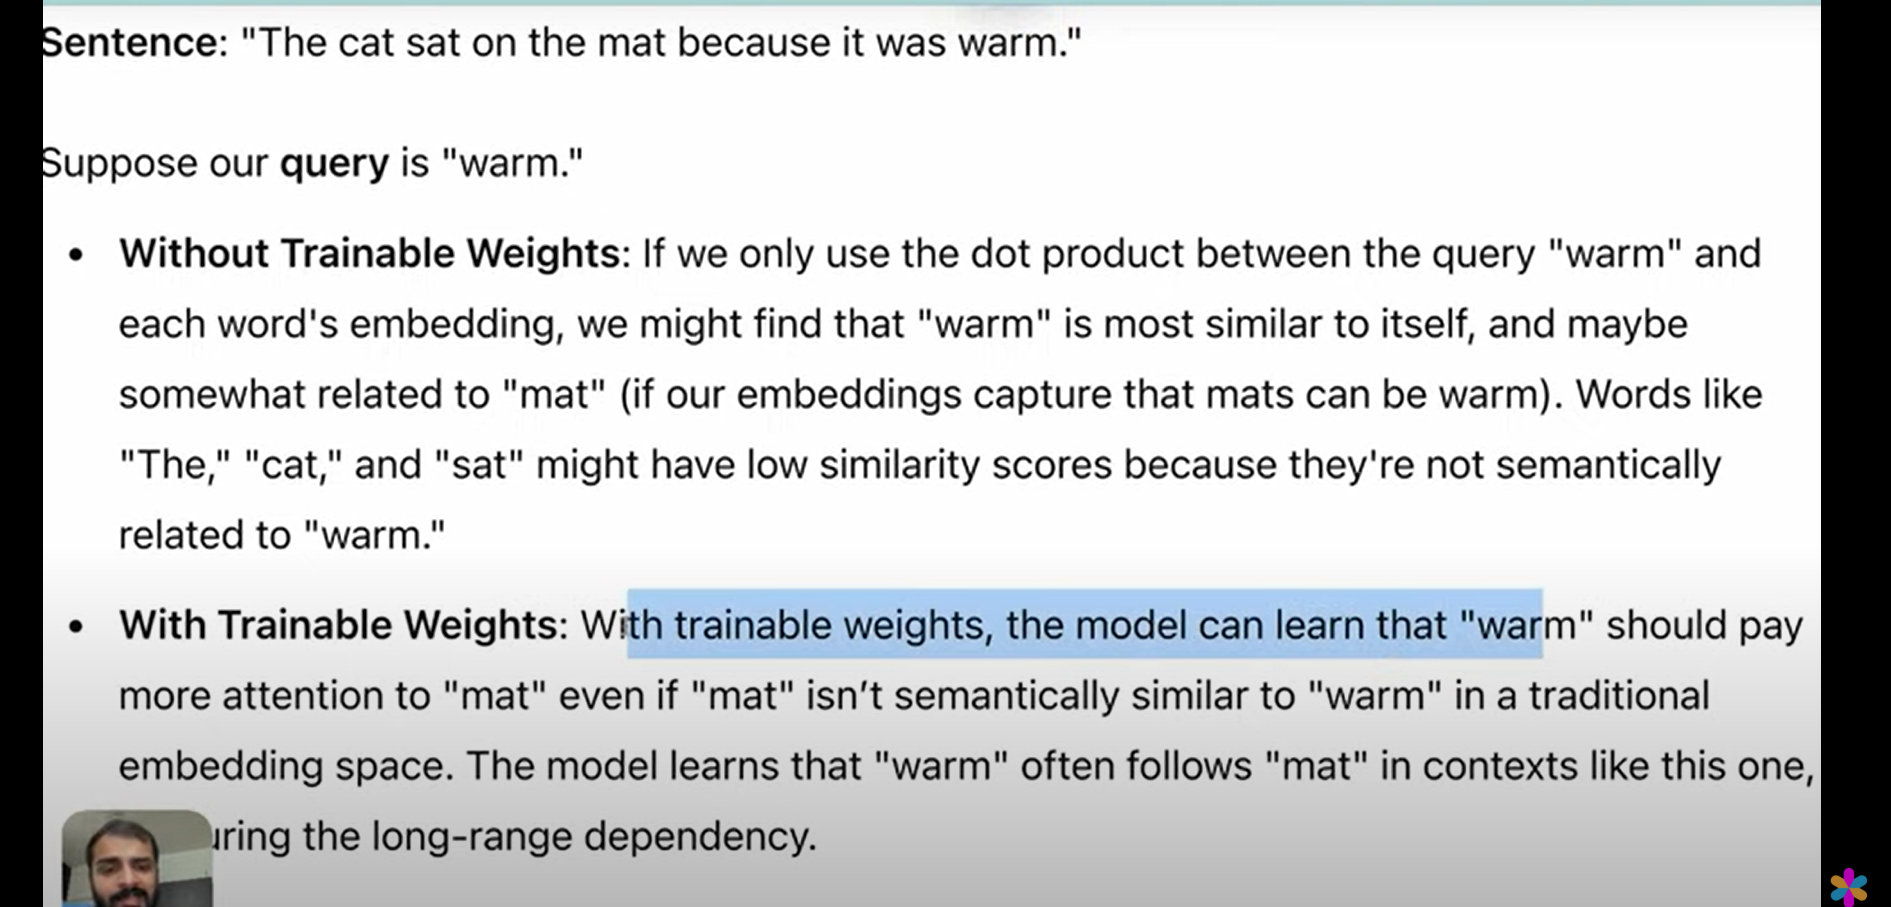

---



### Self attention mechanism with key, query and value matrics


In [1]:
import torch
# create an input matrix
input  = torch.tensor(
    [[0.43,0.15,0.89],
     [0.55,0.87,0.66],
     [0.57,0.85,0.64],
     [0.22,0.58,0.33],
     [0.77,0.25,0.10],
     [0.05,0.80,0.55]]
)

In [3]:
print(input.shape)

torch.Size([6, 3])


In [2]:
# suppose the seecond vector as the query
x_2 = input[1]
d_in = input.shape[1]
d_out = 2

In [5]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)

In [6]:
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [10]:
Query = torch.matmul(input,W_query)
Key  = torch.matmul(input,W_key)
Value = torch.matmul(input,W_value)


print("Shape of keys : " ,Key.shape)

print("Shape of Value : " ,Value.shape)

print("Shape of Query : ", Query.shape)

Shape of keys :  torch.Size([6, 2])
Shape of Value :  torch.Size([6, 2])
Shape of Query :  torch.Size([6, 2])


In [20]:
#now computing the similarity between queeries and keys
# every row represent the similarity between ith query and other keys
import numpy as np
attention_scores  = Query @ Key.T/np.sqrt(Key.shape[1]) # scaled dot product attention
print("similarty between query and keys shape : ", attention_scores.shape)

similarty between query and keys shape :  torch.Size([6, 6])


In [21]:
## now normalizing the attention scores
attention_weights = torch.softmax(attention_scores,dim=-1)
print(torch.sum(attention_weights,dim=-1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<div class="alert alert-block alert-warning">

Reason 1: For stability in learning

The softmax function is sensitive to the magnitudes of its inputs. When the inputs are large, the differences between the exponential values of each input become much more pronounced. This causes the softmax output to become "peaky," where the highest value receives almost all the probability mass, and the rest receive very little.

In attention mechanisms, particularly in transformers, if the dot products between query and key vectors become too large (like multiplying by 8 in this example), the attention scores can become very large. This results in a very sharp softmax distribution, making the model overly confident in one particular "key." Such sharp distributions can make learning unstable,
    
</div>



<div class="alert alert-block alert-warning">

Reason 2: To make the variance of the dot product stable

The dot product of  Q and K increases the variance because multiplying two random numbers increases the variance.

The increase in variance grows with the dimension.

Dividing by sqrt (dimension) keeps the variance close to 1
    
</div>

In [35]:
### explanation of resaon 2 with the help of an example
import numpy as np
def compute_variance(dim):
  q = torch.randn((dim,dim))
  k  = torch.randn((dim,dim))
  dot_product = q@k.T
  scaled_dot_product = q@k.T/(k.shape[1]**0.5)
  return torch.var(dot_product),torch.var(scaled_dot_product)


# for dimension 5
variance_before_5, variance_after_5 = compute_variance(5)
print("Variance before scaling for dimension 5 is :", variance_before_5)
print("Variance after scaling for dimension 5 is :", variance_after_5)


# for dimension 100
variance_before_100, variance_after_100 = compute_variance(100)
print("Variance before scaling for dimension 100 is :", variance_before_100)
print("Variance after scaling for dimension 100 is :", variance_after_100)



Variance before scaling for dimension 5 is : tensor(2.5073)
Variance after scaling for dimension 5 is : tensor(0.5015)
Variance before scaling for dimension 100 is : tensor(98.7265)
Variance after scaling for dimension 100 is : tensor(0.9873)


In [36]:
## Calcualting context vector
context_vector = attention_weights@Value
print(context_vector.shape)
print(context_vector)

torch.Size([6, 2])
tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


### Implementing python class for self attention mechanism

In [32]:
import torch.nn as nn
class Self_Attention(nn.Module):
  def __init__(self,d_in, d_out):
    super().__init__()
    self.W_query = nn.Parameter(torch.rand(d_in,d_out))
    self.W_key = nn.Parameter(torch.rand(d_in,d_out))
    self.W_value =nn.Parameter(torch.rand(d_in,d_out))

  def forward(self, x):
    keys = x@self.W_key
    value  = x@self.W_value
    quer = x@self.W_query

    attention_scores = quer@keys.T/(keys.shape[1]**0.5)
    attention_weights = torch.softmax(attention_scores,dim=-1)
    context_vector = attention_weights@value
    return context_vector

In [34]:
SelfAttention = Self_Attention(3,2)
context_vector = SelfAttention(input)
print(context_vector)

tensor([[0.9364, 1.0811],
        [0.9422, 1.0878],
        [0.9427, 1.0884],
        [0.9242, 1.0666],
        [0.9430, 1.0881],
        [0.9206, 1.0626]], grad_fn=<MmBackward0>)
